# **Wine Quality**
#### DSCI 100 Winter T2 Group 006-042

## Introduction:

[insert introduction here]

## Preliminary Exploratory Data Analysis:

In [140]:
# loading libraries
library(tidyverse)
library(tidymodels)
library(gridExtra)

#### Attribute (units):
- Fixed acidity ($g/dm^3$)
- Volatile acidity ($g/dm^3$)
- Citric acid ($g/dm^3$)
- Residual sugar ($g/dm^3$)
- Chlorides ($g/dm^3$)
- Free sulfur dioxide ($mg/dm^3$)
- Total sulfur dioxide ($mg/dm^3$)
- Density ($g/cm^3$)
- pH
- Sulphates ($g/dm^3$)
- Alcohol ($vol.\%$)

In [311]:
# reading data
data <- read_csv("data/wine_quality.csv") %>%
        subset(select = -Id)

Parsed with column specification:
cols(
  `fixed acidity` = col_double(),
  `volatile acidity` = col_double(),
  `citric acid` = col_double(),
  `residual sugar` = col_double(),
  chlorides = col_double(),
  `free sulfur dioxide` = col_double(),
  `total sulfur dioxide` = col_double(),
  density = col_double(),
  pH = col_double(),
  sulphates = col_double(),
  alcohol = col_double(),
  quality = col_double(),
  Id = col_double()
)



In [324]:
# cleaning and wrangling data
colnames(data) <- gsub(" ", "_", names(data))
colnames(data)[colnames(data) %in% c("free_sulfur_dioxide", "total_sulfur_dioxide")] <- c("free_so2", "total_so2")

clean_data <- data %>%
              mutate(quality = quality - 2) %>%
              mutate(quality = as_factor(quality)) %>%
              subset(select = -c(fixed_acidity, volatile_acidity, citric_acid, free_so2))

In [325]:
# splitting data
clean_data_split <- initial_split(clean_data, prop = 0.5, strata = quality)
train_data <- training(clean_data_split)
test_data <- testing(clean_data_split)

In [326]:
glimpse(train_data)

Rows: 572
Columns: 8
$ residual_sugar <dbl> 1.90, 2.60, 2.30, 1.80, 1.60, 1.20, 1.80, 1.60, 1.80, …
$ chlorides      <dbl> 0.076, 0.098, 0.092, 0.075, 0.069, 0.065, 0.097, 0.089…
$ total_so2      <dbl> 34, 67, 54, 40, 59, 21, 65, 59, 56, 37, 67, 11, 16, 82…
$ density        <dbl> 0.9978, 0.9968, 0.9970, 0.9978, 0.9964, 0.9946, 0.9959…
$ pH             <dbl> 3.51, 3.20, 3.26, 3.51, 3.30, 3.39, 3.28, 3.58, 3.04, …
$ sulphates      <dbl> 0.56, 0.68, 0.65, 0.56, 0.46, 0.47, 0.54, 0.52, 1.08, …
$ alcohol        <dbl> 9.4, 9.8, 9.8, 9.4, 9.4, 10.0, 9.2, 9.9, 9.2, 9.5, 9.4…
$ quality        <fct> 3, 3, 3, 3, 3, 5, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 4, 2, …


In [327]:
# summarizing data
train_data_mean_summary <- train_data %>%
                      select(-quality) %>%
                      map_dfr(mean, na.rm = TRUE)
colnames(train_data_mean_summary) <- paste("mean", colnames(train_data_mean_summary), sep = "_")

train_data_quality_summary <- test_data %>%
                              group_by(quality) %>%
                              summarize(count = n(), proportion = n() / nrow(test_data) * 100)

`summarise()` ungrouping output (override with `.groups` argument)



In [328]:
train_data_mean_summary

mean_residual_sugar,mean_chlorides,mean_total_so2,mean_density,mean_pH,mean_sulphates,mean_alcohol
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2.481818,0.08705944,46.00087,0.99669,3.315192,0.6582867,10.44152


In [329]:
train_data_quality_summary

quality,count,proportion
<fct>,<int>,<dbl>
1,3,0.525394
2,18,3.152364
3,239,41.856392
4,231,40.455342
5,72,12.609457
6,8,1.401051


In [330]:
# scaling data
train_data_scaled = train_data %>%
mutate(scaled_residual_sugar = scale(residual_sugar, center = TRUE),
       scaled_alcohol = scale(alcohol, center = TRUE),
       scaled_density = scale(density , center = TRUE))

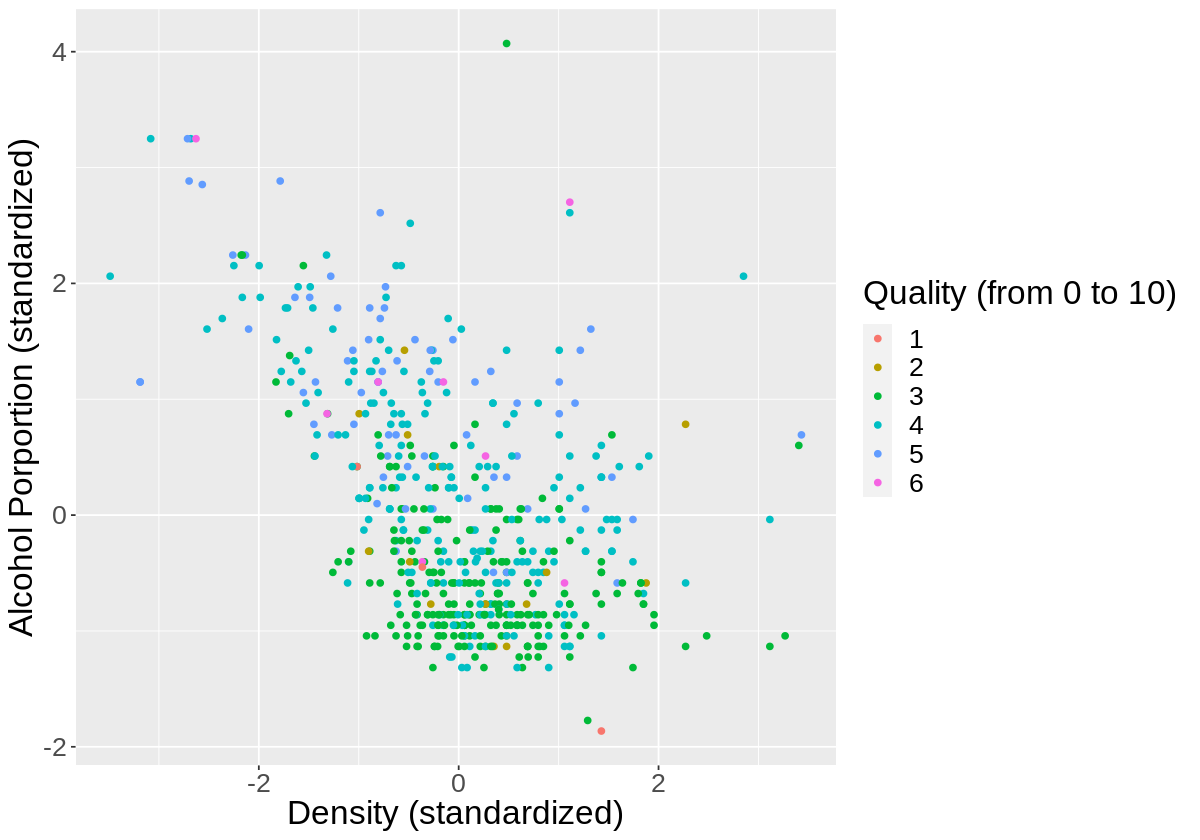

In [331]:
# visualizing data
options(repr.plot.width = 10, options.repr.plot.height = 15)

plot <- train_data_scaled %>%
            ggplot(aes(x = scaled_density , y= scaled_alcohol , color = quality)) +
            geom_point() +
            labs(x = "Density (standardized)" , y = "Alcohol Porportion (standardized)" , color = "Quality (from 0 to 10)") + 
            theme(text = element_text(size = 20))
plot

## Methods:

[insert methods here]

## Expected Outcomes and Significance:

[insert expected outcomes and significance here]